## Importing useful libs

In [304]:
import pandas as pd
import requests
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
from IPython.display import display
import re
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1st Section: Gathering

In [305]:
# Download the Twitter archive CSV file manually(the 1st type of download{rubric})
df_E = pd.read_csv('twitter-archive-enhanced.csv')

In [306]:
# Download the tweet image predictions TSV file(the 2nd type of download{rubric})
# URL of the file
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

# Send a GET request to the URL
response = requests.get(url)

# Save the file locally
with open('image-predictions.tsv', 'wb') as file:
    file.write(response.content)

In [307]:
# Read the image predictions TSV file
df_I = pd.read_csv('image-predictions.tsv', sep='\t')

### the querying and process of getting additional info from the twitter api

In [308]:
# Extract the 'tweet_id' column(a pandas Serie)
# from the DataFrame
tweet_ids= df_E['tweet_id']
# checking the number of tweet IDs
len(tweet_ids)

2356

the code for taking the data from the api it takes a long time(+15 mins) to work again so commented it, it also deletes the content that was already in the tweet json file

In [309]:
# # Download the tweet JSON file via Twitter's API
# # Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# # These are hidden to comply with Twitter's API terms and conditions
# consumer_key = 'HIDDEN'
# consumer_secret = 'HIDDEN'
# access_token = 'HIDDEN'
# access_secret = 'HIDDEN'

# auth = OAuthHandler(consumer_key, consumer_secret)
# auth.set_access_token(access_token, access_secret)

# api = tweepy.API(auth, wait_on_rate_limit=True)

# # NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# # df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# # change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# # NOTE TO REVIEWER: this student had mobile verification issues so the following
# # Twitter API code was sent to this student from a Udacity instructor
# # Tweet IDs for which to gather additional data via Twitter's API
# tweet_ids = df_E.tweet_id.values
# len(tweet_ids)

# # Query Twitter's API for JSON data for each tweet ID in the Twitter archive
# count = 0
# fails_dict = {}
# start = timer()
# # Save each tweet's returned JSON as a new line in a .txt file
# with open('tweet_json.txt', 'w') as outfile:
#     # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
#     for tweet_id in tweet_ids:
#         count += 1
#         print(str(count) + ": " + str(tweet_id))
#         try:
#             tweet = api.get_status(tweet_id, tweet_mode='extended')
#             print("Success")
#             json.dump(tweet._json, outfile)
#             outfile.write('\n')
#         except tweepy.TweepyException as e:
#             print("Fail")
#             fails_dict[tweet_id] = e
#             pass
# end = timer()
# print(end - start)
# print(fails_dict)

In [310]:
# Read the json file and convert it to a DataFrame
df_j = pd.read_json('tweet_json.txt', lines=True)

# 2nd Section: Assessing

## P1: Visual Assessment

### P1.1: twitter-archive-enhanced

In [311]:
#i will look at the df visually and will try to detect any issues
# Display the first 5 rows
print("First 5 rows of df_E:")
display(df_E.head())

# Display the last 5 rows
print("Last 5 rows of df_E:")
display(df_E.tail())

# Display 10 random rows
print("10 random rows of df_E:")
display(df_E.sample(10))

First 5 rows of df_E:


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,NaN,NaN,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,NaN,NaN,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,NaN,NaN,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,NaN,NaN,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,NaN,NaN,NaN


Last 5 rows of df_E:


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,NaN,NaN,NaN,NaN,NaN
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,NaN,NaN,NaN,NaN
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,NaN,NaN,NaN,NaN
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,NaN,NaN,NaN,NaN
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,NaN,NaN,NaN,NaN,NaN


10 random rows of df_E:


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1921,674262580978937856,NaN,NaN,2015-12-08 16:21:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Gus. He's super stoked about being an ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674262580...,9,10,Gus,NaN,NaN,pupper,NaN
2334,666293911632134144,NaN,NaN,2015-11-16 16:37:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a funny dog. Weird toes. Won't come do...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666293911...,3,10,a,NaN,NaN,NaN,NaN
322,834167344700198914,NaN,NaN,2017-02-21 22:26:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sunshine. She doesn't believe in perso...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/834167344...,11,10,Sunshine,NaN,NaN,NaN,NaN
846,766313316352462849,NaN,NaN,2016-08-18 16:38:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Oscar. He has legendary eyebrows and h...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/766313316...,12,10,Oscar,NaN,NaN,NaN,NaN
971,750101899009982464,NaN,NaN,2016-07-04 23:00:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Lilah. She agreed on one quick pic. Now s...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/750101899...,11,10,Lilah,NaN,NaN,NaN,NaN
1756,678767140346941444,NaN,NaN,2015-12-21 02:41:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Mia. She makes awful decisions. 8/10 h...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/678767140...,8,10,Mia,NaN,NaN,NaN,NaN
1445,696518437233913856,NaN,NaN,2016-02-08 02:18:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Oh my god 10/10 for every little hot dog pupper,NaN,NaN,NaN,NaN,10,10,NaN,NaN,NaN,pupper,NaN
1294,707995814724026368,NaN,NaN,2016-03-10 18:25:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Farfle. He lost his back legs during t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/707995814...,12,10,Farfle,NaN,NaN,NaN,NaN
303,836397794269200385,NaN,NaN,2017-02-28 02:09:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Buddy. He ran into a gl...,8.178278e+17,4.196984e+09,2017-01-07 20:18:46 +0000,https://twitter.com/dog_rates/status/817827839...,13,10,Buddy,NaN,NaN,NaN,NaN
994,748568946752774144,NaN,NaN,2016-06-30 17:28:39 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cora. She rings a bell for treats. 12/...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/748568946...,12,10,Cora,NaN,NaN,NaN,NaN


notes: 
- it seems that i need to add the data for the retweeted info columns(quality{completness}) 
- also i dont think there's a need for the 2 reply columns so i will drop them (fascilitating the environment)
- there seems to be an inconsistency in the rateing denomenator even though its standarized as 10 so i will look into that(quality{consistency})
- i will fill the nan cells with either not mentioned or unknown but as of this cell it needs further investigation(quality{completness})
- there's alot of inaccuracy in the name column of the dogs ,dogs get named as "a" which is obviously incorrect(quality{completness,accuracy})
- i found something interesting; the doge stages are all nan in some rows meaning that there's a (quality{completness}) issue their
- We also don't need the retweet columns so i will drop them

In [312]:
# this is an iteration becouse i discovered some issues
# CODE for 2nd issue
# Inspect the rows with abnormal rating_denominator values and display the full text
abnormal_rows = df_E[df_E['rating_denominator'] != 10][['tweet_id', 'text', 'rating_numerator', 'rating_denominator']]
pd.set_option('display.max_colwidth', None)  # Show full text in the 'text' column
print(abnormal_rows)
pd.reset_option('display.max_colwidth') 

                tweet_id  \
313   835246439529840640   
342   832088576586297345   
433   820690176645140481   
516   810984652412424192   
784   775096608509886464   
902   758467244762497024   
1068  740373189193256964   
1120  731156023742988288   
1165  722974582966214656   
1202  716439118184652801   
1228  713900603437621249   
1254  710658690886586372   
1274  709198395643068416   
1351  704054845121142784   
1433  697463031882764288   
1598  686035780142297088   
1634  684225744407494656   
1635  684222868335505415   
1662  682962037429899265   
1663  682808988178739200   
1779  677716515794329600   
1843  675853064436391936   
2335  666287406224695296   

                                                                                                                                                                           text  \
313                                                                          @jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a

notes:
- number 784 and 1068 are duplicates in text.. i found that while fixing another problem so another (quality issue)

In [313]:
# look through the info of the df_E,trying to identify any issues with dtypes or missing values
print("Info of df_E:")
df_E.info()

Info of df_E:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        1611 non-null   object 
 13  doggo              

notes:
- the dog stages each have a column of their own which is in effeicient(tideness)
- the source column is unclear and the url is to big and is put in a html tag(tideness)
- timestamp column should be datetime rather than object(quality)

### P1.2: image predictions

In [314]:
#i will look at the df visually and will try to detect any issues
# Display the first 5 rows
print("First 5 rows of df_I:")
display(df_I.head())

# Display the last 5 rows
print("Last 5 rows of df_I:")
display(df_I.tail())

# Display 10 random rows
print("10 random rows of df_I:")
display(df_I.sample(10))

First 5 rows of df_I:


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


Last 5 rows of df_I:


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


10 random rows of df_I:


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
535,676942428000112642,https://pbs.twimg.com/media/CWT7imQXIAMwpQ2.jpg,1,black-footed_ferret,0.707199,False,polecat,0.154630,False,weasel,0.097626,False
1967,867900495410671616,https://pbs.twimg.com/media/DAtm5MkXoAA4R6P.jpg,1,Labrador_retriever,0.522644,True,kuvasz,0.332461,True,dalmatian,0.032008,True
1443,775729183532220416,https://pbs.twimg.com/media/CsPxk85XEAAeMQj.jpg,1,web_site,0.989407,False,hand-held_computer,0.002139,False,menu,0.002115,False
969,706516534877929472,https://pbs.twimg.com/media/Cc4NCQiXEAEx2eJ.jpg,1,golden_retriever,0.772685,True,Labrador_retriever,0.071665,True,golfcart,0.020993,False
1310,754120377874386944,https://pbs.twimg.com/media/CncseIzWgAA4ghH.jpg,1,chow,0.168909,True,Norfolk_terrier,0.129114,True,Pomeranian,0.120822,True
51,666983947667116034,https://pbs.twimg.com/media/CUGaXDhW4AY9JUH.jpg,1,swab,0.589446,False,chain_saw,0.190142,False,wig,0.034510,False
1863,842846295480000512,https://pbs.twimg.com/media/C7JkO0rX0AErh7X.jpg,1,Labrador_retriever,0.461076,True,golden_retriever,0.154946,True,Chihuahua,0.110249,True
836,694206574471057408,https://pbs.twimg.com/media/CaJRMPQWIAA1zL9.jpg,1,Shih-Tzu,0.352547,True,toy_poodle,0.155720,True,Maltese_dog,0.116657,True
386,673350198937153538,https://pbs.twimg.com/media/CVg4bo8WEAANEEE.jpg,1,West_Highland_white_terrier,0.119188,True,quill,0.104014,False,Maltese_dog,0.093944,True
298,671485057807351808,https://pbs.twimg.com/media/CVGYGNYXAAAQ9m-.jpg,1,Samoyed,0.627901,True,Great_Pyrenees,0.276421,True,kuvasz,0.057874,True


notes:
- until now i don't any problems with images file 
- i have a suggestion though, the data has rows where the predictions are all false which mean that the row itself has no value so i will delete them in the cleaning section

In [315]:
# look through the info of the df_I,trying to identify any issues with dtypes or missing values
print("Info of df_I:")
df_I.info()

Info of df_I:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


it seems clean so i will move on from it

### P1.3: tweet_json

In [316]:
#i will look at the df visually and will try to detect any issues
# Display the first 5 rows
print("First 5 rows of df_j:")
display(df_j.head())

# Display the last 5 rows
print("Last 5 rows of df_j:")
display(df_j.tail())

# Display 10 random rows (only if df_j is not empty)
print("10 random rows of df_j:")
if not df_j.empty:
	display(df_j.sample(10))
else:
	print("df_j is empty, cannot sample rows.")

First 5 rows of df_j:


,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


Last 5 rows of df_j:


,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
2349,2015-11-16 00:24:50+00:00,666049248165822465,666049248165822464,Here we have a 1949 1st generation vulpix. Enj...,False,"[0, 120]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666049244999131136, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,111,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2350,2015-11-16 00:04:52+00:00,666044226329800704,666044226329800704,This is a purebred Piers Morgan. Loves to Netf...,False,"[0, 137]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666044217047650304, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,311,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2351,2015-11-15 23:21:54+00:00,666033412701032449,666033412701032448,Here is a very happy pup. Big fan of well-main...,False,"[0, 130]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666033409081393153, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,128,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2352,2015-11-15 23:05:30+00:00,666029285002620928,666029285002620928,This is a western brown Mitsubishi terrier. Up...,False,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666029276303482880, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,132,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2353,2015-11-15 22:32:08+00:00,666020888022790149,666020888022790144,Here we have a Japanese Irish Setter. Lost eye...,False,"[0, 131]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666020881337073664, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,2535,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


10 random rows of df_j:


,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
1915,2015-12-08 18:17:56+00:00,674291837063053312,674291837063053312,This is Kenny. He just wants to be included in...,False,"[0, 92]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 674291829689331712, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,15817,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
87,2017-06-14 21:06:43+00:00,875097192612077568,875097192612077568,You'll get your package when that precious man...,False,"[0, 96]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,...,27997,False,False,0.0,0.0,en,NaN,8.744134e+17,8.744134e+17,{'created_at': 'Mon Jun 12 23:49:34 +0000 2017...
2196,2015-11-23 15:35:39+00:00,668815180734689280,668815180734689280,This is a wild Toblerone from Papua New Guinea...,False,"[0, 137]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 668815173491302400, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,610,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
109,2017-06-03 20:33:19+00:00,871102520638267392,871102520638267392,Never doubt a doggo 14/10 https://t.co/AbBLh2FZCH,False,"[0, 25]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,...,21461,False,False,0.0,0.0,en,NaN,8.710758e+17,8.710758e+17,{'created_at': 'Sat Jun 03 18:46:59 +0000 2017...
910,2016-07-25 15:19:12+00:00,757596066325864448,757596066325864448,Here's another picture without a dog in it. Id...,False,"[0, 116]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 757596060105707520, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,4808,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2171,2015-11-25 01:20:08+00:00,669324657376567296,669324657376567296,Meet Ralf. He's a miniature Buick DiCaprio. Ca...,False,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 669324644248219648, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,525,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1394,2016-02-17 02:54:04+00:00,699788877217865730,699788877217865728,Say hello to Nala. She's a Freckled High Brusc...,False,"[0, 94]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 699788867692531712, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,2458,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1585,2016-01-12 03:20:05+00:00,686749460672679938,686749460672679936,Strange pup here. Easily manipulated. Rather i...,False,"[0, 137]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 686749394683691008, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,3812,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1246,2016-03-20 01:28:47+00:00,711363825979756544,711363825979756544,"""Please, no puparazzi"" 11/10 https://t.co/nJIX...",False,"[0, 52]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 711363817834295296, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,3996,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2064,2015-11-30 02:01:49+00:00,671147085991960577,671147085991960576,This is a Helvetica Listerine named Rufus. Thi...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 671147082493919232, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,713,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


notes:
- nothing so far

In [317]:
# look through the info of the df_j,trying to identify any issues with dtypes or missing values
print("Info of df_j:")
df_j.info()

Info of df_j:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id                             2354 non-null   int64              
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_t

notes:
- i will drop all the columns that is null > 75% becouse they have no value
- that's it for this df

## P2: Programmatic Assessment

### P2.1: twitter-archive-enhanced

In [318]:
# Missing values
print("\nMissing values:")
print(df_E.isnull().sum())


Missing values:
tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                           745
doggo                         2259
floofer                       2346
pupper                        2099
puppo                         2326
dtype: int64


notes:
- the dog stages columns will not have missing values after i fix the tidness issue
- as mentioned before i will drop reply columns 
- name will be filled with unknwon as the column has value,same goes for the url column

In [319]:
# Duplicate rows
print("\nNumber of duplicate rows:")
print(df_E.duplicated().sum())


Number of duplicate rows:
0


no duplicated rows
,what about the ids though?

In [320]:
# Check for duplicates
print("\nNumber of duplicates in the text column:")
print(df_E.duplicated(subset='text').sum())
# Check for duplicates in the tweet_id column
print("\nNumber of duplicate tweet_id values:")
print(df_E.duplicated(subset='tweet_id').sum())



Number of duplicates in the text column:
0

Number of duplicate tweet_id values:
0


ok so no duplicates at all

In [321]:
# Describe numeric columns
print("\nDescribe numeric columns:")
print(df_E.describe())


Describe numeric columns:
           tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
count  2.356000e+03           7.800000e+01         7.800000e+01   
mean   7.427716e+17           7.455079e+17         2.014171e+16   
std    6.856705e+16           7.582492e+16         1.252797e+17   
min    6.660209e+17           6.658147e+17         1.185634e+07   
25%    6.783989e+17           6.757419e+17         3.086374e+08   
50%    7.196279e+17           7.038708e+17         4.196984e+09   
75%    7.993373e+17           8.257804e+17         4.196984e+09   
max    8.924206e+17           8.862664e+17         8.405479e+17   

       retweeted_status_id  retweeted_status_user_id  rating_numerator  \
count         1.810000e+02              1.810000e+02       2356.000000   
mean          7.720400e+17              1.241698e+16         13.126486   
std           6.236928e+16              9.599254e+16         45.876648   
min           6.661041e+17              7.832140e+05          0.000000   

confirmed the rating anomaly  rating_denominator ; min is 0(not logical),max is 170 also not logical

In [322]:
print(df_E[['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp']].isnull().sum())

retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
dtype: int64


In [323]:
print(df_E[['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id']].dtypes)

in_reply_to_status_id       float64
in_reply_to_user_id         float64
retweeted_status_id         float64
retweeted_status_user_id    float64
dtype: object


In [324]:
print(df_E[df_E[['doggo', 'floofer', 'pupper', 'puppo']].isnull().all(axis=1) & df_E['name'].isnull()].shape[0])

585


notes:
- there are 585 rows where all the dog stages columns are nan valuesink that means that in the full text the stage of the dog wasn't mentioned so i should fill these with"not mentioned"

### P2.2: tweet_json

In [325]:
# 2. Check for columns with mostly missing values (quality/tidiness)
print("\nColumns with more than 75% missing values:")
print(df_j.isnull().mean()[df_j.isnull().mean() > 0.75])


Columns with more than 75% missing values:
in_reply_to_status_id        0.966865
in_reply_to_status_id_str    0.966865
in_reply_to_user_id          0.966865
in_reply_to_user_id_str      0.966865
in_reply_to_screen_name      0.966865
geo                          1.000000
coordinates                  1.000000
place                        0.999575
contributors                 1.000000
retweeted_status             0.923959
quoted_status_id             0.987681
quoted_status_id_str         0.987681
quoted_status                0.988105
dtype: float64


notes:
- this gives me an overview of the least important columns since retweet and favourite count aren't in them its safe to drop them

In [326]:
# 3. Check for duplicate tweet IDs (quality)
print("\nDuplicate tweet_id values in df_j:")
print(df_j.duplicated(subset='id').sum())


Duplicate tweet_id values in df_j:
0


ids are clean that confirms that i can merge safely

In [327]:
# 4. Check data types for possible conversion needs (quality/tidiness)
print("\nData types in df_j:")
print(df_j.dtypes)



Data types in df_j:
created_at                       datetime64[ns, UTC]
id                                             int64
id_str                                         int64
full_text                                     object
truncated                                       bool
display_text_range                            object
entities                                      object
extended_entities                             object
source                                        object
in_reply_to_status_id                        float64
in_reply_to_status_id_str                    float64
in_reply_to_user_id                          float64
in_reply_to_user_id_str                      float64
in_reply_to_screen_name                       object
user                                          object
geo                                          float64
coordinates                                  float64
place                                         object
contributors             

notes:
- theirs alot of inaccuracies in the datatypes of specifc columns but i might not need them anyway so i will look more into this in the cleaning section

In [328]:
# Check unique values and counts in the 'lang' column of jcleaned

if 'lang' in df_j.columns:
    print("Unique language codes in jcleaned:")
    print(df_j['lang'].value_counts())
else:
    print("'lang' column not found in jcleaned.")

Unique language codes in jcleaned:
lang
en     2336
und       7
in        3
nl        3
eu        1
es        1
tl        1
ro        1
et        1
Name: count, dtype: int64


notes:
- there are some undefined values..since they are less than 5% we can just drop them to not make any misunderstandings

In [329]:
# Check for duplicate values in each column of df_j
print("\nChecking for duplicate values in each column of df_j:")
for col in df_j.columns:
    num_duplicates = df_j[col].duplicated().sum()
    print(f"Column '{col}': {num_duplicates} duplicate values")


Checking for duplicate values in each column of df_j:
Column 'created_at': 0 duplicate values
Column 'id': 0 duplicate values
Column 'id_str': 0 duplicate values
Column 'full_text': 0 duplicate values
Column 'truncated': 2353 duplicate values
Column 'display_text_range': 2211 duplicate values
Column 'entities': 101 duplicate values
Column 'extended_entities': 280 duplicate values
Column 'source': 2350 duplicate values
Column 'in_reply_to_status_id': 2276 duplicate values
Column 'in_reply_to_status_id_str': 2276 duplicate values
Column 'in_reply_to_user_id': 2322 duplicate values
Column 'in_reply_to_user_id_str': 2322 duplicate values
Column 'in_reply_to_screen_name': 2322 duplicate values
Column 'user': 2275 duplicate values
Column 'geo': 2353 duplicate values
Column 'coordinates': 2353 duplicate values
Column 'place': 2352 duplicate values
Column 'contributors': 2353 duplicate values
Column 'is_quote_status': 2352 duplicate values
Column 'retweet_count': 630 duplicate values
Column '

since the retweet and favourite counts are a numeric value i think its okay to have duplicates 

In [330]:
# Describe numeric columns
print("\nDescribe numeric columns in df_j:")
if not df_j.empty and len(df_j.columns) > 0:
    print(df_j.describe())
else:
    print("df_j is empty or has no columns.")


Describe numeric columns in df_j:
                 id        id_str  in_reply_to_status_id  \
count  2.354000e+03  2.354000e+03           7.800000e+01   
mean   7.426978e+17  7.426978e+17           7.455079e+17   
std    6.852812e+16  6.852812e+16           7.582492e+16   
min    6.660209e+17  6.660209e+17           6.658147e+17   
25%    6.783975e+17  6.783975e+17           6.757419e+17   
50%    7.194596e+17  7.194596e+17           7.038708e+17   
75%    7.993058e+17  7.993058e+17           8.257804e+17   
max    8.924206e+17  8.924206e+17           8.862664e+17   

       in_reply_to_status_id_str  in_reply_to_user_id  \
count               7.800000e+01         7.800000e+01   
mean                7.455079e+17         2.014171e+16   
std                 7.582492e+16         1.252797e+17   
min                 6.658147e+17         1.185634e+07   
25%                 6.757419e+17         3.086374e+08   
50%                 7.038708e+17         4.196984e+09   
75%                 8.257

notes:
- i don't see any outliers or negatives while using the describe function
- But after consideration the id_str doesnot really have a value in the df so i will drop it

### P2.3: image-predictions

In [331]:
# Check for missing values in df_I
print("\nMissing values in df_I:")
print(df_I.isnull().sum())


Missing values in df_I:
tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64


no nulls

In [332]:
# Check that all boolean columns in df_I only contain True/False values

bool_cols = ['p1_dog', 'p2_dog', 'p3_dog']
for col in bool_cols:
    if col in df_I.columns:
        print(f"Unique values in '{col}': {df_I[col].unique()}")

Unique values in 'p1_dog': [ True False]
Unique values in 'p2_dog': [ True False]
Unique values in 'p3_dog': [ True False]


so no unique values other than true and false here

In [333]:
# Check for duplicate rows in df_I
print("\nNumber of duplicate rows in df_I:")
print(df_I.duplicated().sum())


Number of duplicate rows in df_I:
0


no duplicates

In [334]:
# Check data types in df_I
print("\nData types in df_I:")
print(df_I.dtypes)


Data types in df_I:
tweet_id      int64
jpg_url      object
img_num       int64
p1           object
p1_conf     float64
p1_dog         bool
p2           object
p2_conf     float64
p2_dog         bool
p3           object
p3_conf     float64
p3_dog         bool
dtype: object


the datatypes are all right

In [335]:
# Describe numeric columns in df_I
print("\nDescribe numeric columns in df_I:")
print(df_I.describe())


Describe numeric columns in df_I:
           tweet_id      img_num      p1_conf       p2_conf       p3_conf
count  2.075000e+03  2075.000000  2075.000000  2.075000e+03  2.075000e+03
mean   7.384514e+17     1.203855     0.594548  1.345886e-01  6.032417e-02
std    6.785203e+16     0.561875     0.271174  1.006657e-01  5.090593e-02
min    6.660209e+17     1.000000     0.044333  1.011300e-08  1.740170e-10
25%    6.764835e+17     1.000000     0.364412  5.388625e-02  1.622240e-02
50%    7.119988e+17     1.000000     0.588230  1.181810e-01  4.944380e-02
75%    7.932034e+17     1.000000     0.843855  1.955655e-01  9.180755e-02
max    8.924206e+17     4.000000     1.000000  4.880140e-01  2.734190e-01


no outliers,no negatives

In [336]:
# Check for rows where all predictions are False
if {'p1_dog', 'p2_dog', 'p3_dog'}.issubset(df_I.columns):
    num_all_false = (~(df_I['p1_dog'] | df_I['p2_dog'] | df_I['p3_dog'])).sum()
    print(f"\nNumber of rows where all predictions are False: {num_all_false}")



Number of rows where all predictions are False: 324


notes:
- when the predictions are all wrong the row loses it values so these should be dealed with after merging

# Data Quality and Tidiness Issues Summary

## Data Quality Issues (Summary)

1. **Rows in image predictions with all predictions False:**  
    Any row in the image predictions dataset where `p1_dog`, `p2_dog`, and `p3_dog` are all False should be removed, as these rows have no analytical value.

2. **Illogical values in `rating_denominator`:**  
   The `rating_denominator` column contains values as low as 0 and as high as 170, which are not logical for tweet ratings and indicate data entry or extraction errors.

3. **Inaccurate dog names:**  
   The dog names column contains many inaccuracies, such as names like "a", which are clearly not valid dog names,or inaccuracies by having the name in lower case

4. **Missing expanded URLs:**  
   Some tweets are missing expanded URLs, which could be important for referencing the original tweet or media.

5. **ID columns are not the correct type/ they might no have value so i will drop them:**  
   Columns like `id_str` and other `*_str` columns are stored as integers or floats instead of strings, which can cause issues with data integrity and merging but i will drop them for now as they have no use.. i will get them back if they a have a use

6. **ID columns with NaNs are float64:**  
   Columns such as `in_reply_to_status_id` are stored as float64 due to the presence of NaNs, but they should be either strings or nullable integers for proper handling.

7. **Language codes contains undefined langs**
    the langs column contain 7 undefined rows languages and since they are less than 5% we can just drop them

8. **duplicated text:**
    number 784 and 1068 are duplicates in text.. i found that while fixing another problem so another (quality issue)..through iteration.

9. **false p.s:**
    there are some rows where all the predictions in df_I are wrong (not indecating a dog species) these should be as they have no value and that will help in the tidness issue of the dog stages ineffecincy as their should be no nan values in the predictions

10. **retweet columns has no value:**
    the retweet columns dont contribute to the project and are affecting the code negativily

## Tidiness Issues (Summary)

1. **Dog stage columns are inefficient:**  
   The dog stages (`doggo`, `floofer`, `pupper`, `puppo`) each have their own column, which is not tidy. These should be combined into a single column to improve data structure.

2. **Source column is unclear:**  
   The `source` column contains HTML tags and long URLs, making it difficult to interpret. This column should be cleaned to extract readable source information.

3. **Columns with mostly missing values:**  
   Columns with more than 75% missing values (such as `geo`, `coordinates`, `contributors`, `place`, and others in `df_j`) should be dropped as they do not add value to the analysis..


## i will make a copy of the 3 files before starting the cleaning section as to stay safe and as a good practice

In [337]:
Ecleaned = df_E.copy()
jcleaned = df_j.copy()
Icleaned = df_I.copy()

# 3rd Section: Cleaning

### P1: Quality issues:-

### **1st issue**

### **define**
- Rows in the image predictions dataset where p1_dog, p2_dog, and p3_dog are all False do not contribute to the analysis of dog breeds and should be removed.

### **CODE**

In [338]:
# CODE for 1st issue
# Remove rows in Icleaned where all predictions are False
Icleaned = Icleaned[Icleaned[['p1_dog', 'p2_dog', 'p3_dog']].any(axis=1)]

### **TEST**

In [339]:

# Check that there are no rows where all predictions are False
num_all_false = (~(Icleaned['p1_dog'] | Icleaned['p2_dog'] | Icleaned['p3_dog'])).sum()
print("Number of rows with all predictions False after cleaning:", num_all_false)

Number of rows with all predictions False after cleaning: 0


### **2nd issue**

### **define**
- The rating_denominator column contains values such as 0 and 170, which are illogical for standard tweet ratings. This indicates data entry or extraction errors that need correction for accurate rating calculations.

### **Code**

In [340]:

# Inspect the rows with abnormal rating_denominator values and display the full text
abnormal_rows = Ecleaned[Ecleaned['rating_denominator'] != 10][['tweet_id', 'text', 'rating_numerator', 'rating_denominator']]
pd.set_option('display.max_colwidth', None)  # Show full text in the 'text' column
print(abnormal_rows)
pd.reset_option('display.max_colwidth') 

                tweet_id  \
313   835246439529840640   
342   832088576586297345   
433   820690176645140481   
516   810984652412424192   
784   775096608509886464   
902   758467244762497024   
1068  740373189193256964   
1120  731156023742988288   
1165  722974582966214656   
1202  716439118184652801   
1228  713900603437621249   
1254  710658690886586372   
1274  709198395643068416   
1351  704054845121142784   
1433  697463031882764288   
1598  686035780142297088   
1634  684225744407494656   
1635  684222868335505415   
1662  682962037429899265   
1663  682808988178739200   
1779  677716515794329600   
1843  675853064436391936   
2335  666287406224695296   

                                                                                                                                                                           text  \
313                                                                          @jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a

so i found that the anomaly was becease of the analysis done before using machine learning the dogs are rated the right way its just that their were another numbers detected instead of the ratings given but there are special cases like the max where ratings were given to a group of dogs so that stays as is..i will continue the code part of this issue and detect the real ratings by myself 

- 313:13/10  (changed)
- 342: no rating so i will drop this row
- 433:84/70 (stays)
- 516: no rating again same for this one
- 784: is a duplicate of 1068 so it will be dropped
- 902:165/150 (stays)
- 1068: 14/10 (changed)
- 1120:204/170 (stays)
- 1165:13/10 (changed)
- 1202:11/10 (changed)
- 1228:99/90 (stays)
- 1254:80/80 (stays)
- 1274:45/50 (stays)
- 1351:60/50 (stays)
- 1433:44/40 (stays)
- 1598:4/20 i guess? (stays)
- 1634:143/130 (Stays)
- 1635:121/110 (stays)
- 1662:10/10 (changed)
- 1663:20/16 (stays)
- 1779:144/120 (stays)
- 1843:88/80 (stays)
- 2335:9/10 (changed)
--- 
so i will:
- code to change these that actually have a denomenator of 10 
- drop the duplicate in another issue 
- drop the 2 unnessary rows as the ratings are the main value of this file

In [341]:
# Set the correct rating_numerator and rating_denominator for specific tweet_ids

Ecleaned.loc[Ecleaned['tweet_id'] == 722974582966214656, ['rating_numerator', 'rating_denominator']] = [13, 10]   # 1165
Ecleaned.loc[Ecleaned['tweet_id'] == 716439118184652801, ['rating_numerator', 'rating_denominator']] = [11, 10]   # 1202
Ecleaned.loc[Ecleaned['tweet_id'] == 740373189193256964, ['rating_numerator', 'rating_denominator']] = [14, 10]   # 1068
Ecleaned.loc[Ecleaned['tweet_id'] == 835246439529840640, ['rating_numerator', 'rating_denominator']] = [13, 10]   # 313
Ecleaned.loc[Ecleaned['tweet_id'] == 682962037429899265, ['rating_numerator', 'rating_denominator']] = [10, 10]   # 1662
Ecleaned.loc[Ecleaned['tweet_id'] == 666287406224695296,  ['rating_numerator', 'rating_denominator']] = [9, 10]   # 2335

### **Test**

In [342]:

# Print the rating_numerator and rating_denominator for the specified tweet_ids to verify the changes
tweet_ids_to_check = [
    722974582966214656,  # 1165
    716439118184652801,  # 1202
    740373189193256964,  # 1068
    835246439529840640,  # 313
    682962037429899265,  # 1662
    666287406224695296   # 2335
]

print(Ecleaned[Ecleaned['tweet_id'].isin(tweet_ids_to_check)][['tweet_id', 'rating_numerator', 'rating_denominator']])

                tweet_id  rating_numerator  rating_denominator
313   835246439529840640                13                  10
1068  740373189193256964                14                  10
1165  722974582966214656                13                  10
1202  716439118184652801                11                  10
1662  682962037429899265                10                  10
2335  666287406224695296                 9                  10


the denominator is always 10 unless its a special case so issue solved

### **3rd issue**

###  **define:**  
   The dog names column contains many inaccuracies, such as names like "a", which are clearly not valid dog names.

### **Code**

In [343]:
# CODE for 3rd issue
# Identify all inaccuracies in the 'name' column: all-lowercase names (excluding NaN)

# Create a mask for names that are all lowercase (excluding NaN)
mask_lowercase = Ecleaned['name'].apply(lambda x: isinstance(x, str) and x.islower())

# Show all rows with inaccurate dog names (all-lowercase)
inaccurate_names = Ecleaned[mask_lowercase][['name']]
print(inaccurate_names)
# Correct the inaccurate names by capitalizing the first letter
# Set all invalid names to 'unknown'
Ecleaned.loc[mask_lowercase, 'name'] = 'Unknown'

       name
22     such
56        a
118   quite
169   quite
193   quite
...     ...
2349     an
2350      a
2352      a
2353      a
2354      a

[109 rows x 1 columns]


### **Test**

In [344]:

# Check that all invalid names have been set to 'unknown'
print(inaccurate_names)

       name
22     such
56        a
118   quite
169   quite
193   quite
...     ...
2349     an
2350      a
2352      a
2353      a
2354      a

[109 rows x 1 columns]


succesful!

### **4th issue**

### **Define:**
-   Some tweets are missing expanded URLs, which could be important for referencing the original tweet or media.

### **Code**

In [345]:

# Fill missing expanded_urls with 'not available' or a placeholder

if 'expanded_urls' in Ecleaned.columns:
    Ecleaned['expanded_urls'] = Ecleaned['expanded_urls'].fillna('not available')

### **Test**

In [346]:
# TEST for 4th issue
# Check for any remaining nulls in the expanded_urls column
if 'expanded_urls' in Ecleaned.columns:
    print("Number of nulls in expanded_urls:", Ecleaned['expanded_urls'].isnull().sum())

Number of nulls in expanded_urls: 0


### **5th issue**

### **Define**
-    Columns like `id_str` and other `*_str` columns are stored as integers or floats instead of strings, which can cause issues with data integrity and merging but i will drop them for now as they have no use.. i will get them back if they a have a use

### **Code**

In [347]:

# Remove columns with '_str' suffix from jcleaned
jcleaned = jcleaned.drop([col for col in jcleaned.columns if '_str' in col], axis=1)

### **Test**

In [348]:

# Print all columns with '_str' in their names in jcleaned
print("Columns with '_str' in jcleaned:")
print([col for col in jcleaned.columns if '_str' in col])

Columns with '_str' in jcleaned:
[]


### **6th issue**

### **Define**
-  Columns such as `in_reply_to_status_id` are stored as float64 due to the presence of NaNs, but they should be either strings or nullable integers for proper handling.

In [349]:
# Check the dtype and null count for columns with 'id' in their names in Ecleaned and jcleaned

print("Ecleaned columns with 'id' in name, their dtype and null count:")
for col in Ecleaned.columns:
    if 'id' in col:
        print(f"{col}: dtype={Ecleaned[col].dtype}, nulls={Ecleaned[col].isnull().sum()}")

print("\njcleaned columns with 'id' in name, their dtype and null count:")
for col in jcleaned.columns:
    if 'id' in col:
        print(f"{col}: dtype={jcleaned[col].dtype}, nulls={jcleaned[col].isnull().sum()}")

Ecleaned columns with 'id' in name, their dtype and null count:
tweet_id: dtype=int64, nulls=0
in_reply_to_status_id: dtype=float64, nulls=2278
in_reply_to_user_id: dtype=float64, nulls=2278
retweeted_status_id: dtype=float64, nulls=2175
retweeted_status_user_id: dtype=float64, nulls=2175

jcleaned columns with 'id' in name, their dtype and null count:
id: dtype=int64, nulls=0
in_reply_to_status_id: dtype=float64, nulls=2276
in_reply_to_user_id: dtype=float64, nulls=2276
quoted_status_id: dtype=float64, nulls=2325


i will drop all of them except for tweet_id and id since they have many nulls and are in the wrong dtype

### **Code**

In [350]:

# Drop all columns with 'id' in their names except 'tweet_id' in Ecleaned and 'id' in jcleaned using the drop method

Ecleaned = Ecleaned.drop([col for col in Ecleaned.columns if ('id' in col and col != 'tweet_id')], axis=1)
jcleaned = jcleaned.drop([col for col in jcleaned.columns if ('id' in col and col != 'id')], axis=1)

### **Test**

In [351]:

# Check the dtype and null count for columns with 'id' in their names in Ecleaned and jcleaned

print("Ecleaned columns with 'id' in name, their dtype and null count:")
for col in Ecleaned.columns:
    if 'id' in col:
        print(f"{col}: dtype={Ecleaned[col].dtype}, nulls={Ecleaned[col].isnull().sum()}")

print("\njcleaned columns with 'id' in name, their dtype and null count:")
for col in jcleaned.columns:
    if 'id' in col:
        print(f"{col}: dtype={jcleaned[col].dtype}, nulls={jcleaned[col].isnull().sum()}")

Ecleaned columns with 'id' in name, their dtype and null count:
tweet_id: dtype=int64, nulls=0

jcleaned columns with 'id' in name, their dtype and null count:
id: dtype=int64, nulls=0


### **7th issue**

### **Define**
- the langs column contain 7 undefined rows languages and since they are less than 5% we can just drop them

### **Code**

In [352]:

# Drop all rows in jcleaned where the 'lang' column is undefined (e.g., 'und')
if 'lang' in jcleaned.columns:
    jcleaned = jcleaned[jcleaned['lang'] != 'und']

### **Test**

In [353]:

# Check the number of rows with 'und' in the lang column after cleaning
if 'lang' in jcleaned.columns:
    print("Number of rows with 'und' in lang column:", jcleaned[jcleaned['lang'] == 'und'].shape[0])

Number of rows with 'und' in lang column: 0


### **8th issue**

### **Define**
-   number 784 and 1068 are duplicates in text.. i found that while fixing another problem so another (quality issue)..through iteration.

### **Code**

In [354]:

# Drop the row with tweet_id corresponding to line 784 (which is 740373189193256964)
Ecleaned = Ecleaned[Ecleaned['tweet_id'] != 775096608509886464]

### **Test**

In [355]:

# Check that the row with tweet_id 775096608509886464 has been removed
abnormal_rows = Ecleaned[Ecleaned['rating_denominator'] != 10][['tweet_id', 'text', 'rating_numerator', 'rating_denominator']]
pd.set_option('display.max_colwidth', None)  # Show full text in the 'text' column
print(abnormal_rows)
pd.reset_option('display.max_colwidth') 

                tweet_id  \
342   832088576586297345   
433   820690176645140481   
516   810984652412424192   
902   758467244762497024   
1120  731156023742988288   
1228  713900603437621249   
1254  710658690886586372   
1274  709198395643068416   
1351  704054845121142784   
1433  697463031882764288   
1598  686035780142297088   
1634  684225744407494656   
1635  684222868335505415   
1663  682808988178739200   
1779  677716515794329600   
1843  675853064436391936   

                                                                                                                                                                           text  \
342                                                                                                                                    @docmisterio account started on 11/15/15   
433                                                                         The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/

### **9th issue**

### **Define**
- here are some rows where all the predictions in df_I are wrong (not indecating a dog species) these should be dropped since they ahve no value

### **Code**

In [356]:

# Remove rows in Icleaned where all three prediction columns are False
Icleaned = Icleaned[Icleaned[['p1_dog', 'p2_dog', 'p3_dog']].any(axis=1)]

### **Test**

In [357]:

# Test that there are no rows in Icleaned where all three prediction columns are False
num_all_false = (~(Icleaned['p1_dog'] | Icleaned['p2_dog'] | Icleaned['p3_dog'])).sum()
print("Number of rows where all p1_dog, p2_dog, and p3_dog are False:", num_all_false)

Number of rows where all p1_dog, p2_dog, and p3_dog are False: 0


### **10th issue**

### **Define**
-   the retweet columns dont contribute to the project and are affecting the code negativily


### **Code**

In [358]:
# Part 1
# Remove retweets: keep only rows where retweet columns are all null
retweet_cols = ['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp']
if all(col in Ecleaned.columns for col in retweet_cols):
    Ecleaned = Ecleaned[
        Ecleaned['retweeted_status_id'].isnull() &
        Ecleaned['retweeted_status_user_id'].isnull() &
        Ecleaned['retweeted_status_timestamp'].isnull()
    ]

In [359]:
# part 2
# Remove all rows in jcleaned where 'full_text' contains "RT @"
jcleaned = jcleaned[~jcleaned['full_text'].str.contains(r'^RT @', na=False)]

### **Test**

In [384]:
# Part 1 Test
# Check that there are no retweets left in Ecleaned
Ecleaned.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,2017-08-01 16:23:56 +0000,http://twitter.com/download/iphone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN
1,892177421306343426,2017-08-01 00:17:27 +0000,http://twitter.com/download/iphone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN
2,891815181378084864,2017-07-31 00:18:03 +0000,http://twitter.com/download/iphone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN
3,891689557279858688,2017-07-30 15:58:51 +0000,http://twitter.com/download/iphone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN
4,891327558926688256,2017-07-29 16:00:24 +0000,http://twitter.com/download/iphone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN


In [385]:
# Part 2 Test
# Check that there are no retweets left in jcleaned based on 'full_text'
if 'full_text' in jcleaned.columns:
    retweet_count = jcleaned[jcleaned['full_text'].str.contains(r'^RT @', na=False)].shape[0]
    print("Number of retweets in jcleaned after cleaning:", retweet_count)

Number of retweets in jcleaned after cleaning: 0


### P2: tidness issues:-

### **1st issue**

### **Define**
- The dog stages (`doggo`, `floofer`, `pupper`, `puppo`) each have their own column, which is not tidy. These should be combined into a single column to improve data structure, i will drop the orignal columns afterwards

### **Code**

In [361]:

# Only combine dog stages if the columns exist

stage_cols = ['doggo', 'floofer', 'pupper', 'puppo']
existing_stage_cols = [col for col in stage_cols if col in Ecleaned.columns]

if existing_stage_cols:
    def get_dog_stage(row):
        stages = [stage for stage in existing_stage_cols if pd.notnull(row[stage])]
        if not stages:
            return np.nan
        return "-".join(stages)
    Ecleaned['dog_stage'] = Ecleaned.apply(get_dog_stage, axis=1)
    Ecleaned = Ecleaned.drop(columns=existing_stage_cols)

### **Test**

In [362]:

# Check that the 'dog_stage' column has been created correctly
# Display 10 random rows
display(Ecleaned.head())

,tweet_id,timestamp,source,text,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN


### **2nd issue**

### **Define**
-  The `source` column contains HTML tags and long URLs, making it difficult to interpret. This column should be cleaned to extract readable source information.

### **Code**

In [363]:

# Clean the 'source' column in Ecleaned to keep only the original link (URL), removing HTML tags and text
def extract_url(source):
    match = re.search(r'href="([^"]+)"', source)
    return match.group(1) if match else source

Ecleaned['source'] = Ecleaned['source'].apply(extract_url)

### **Test**

In [364]:

# Check that the 'source' column has been cleaned correctly
display(Ecleaned.head())

,tweet_id,timestamp,source,text,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,2017-08-01 16:23:56 +0000,http://twitter.com/download/iphone,This is Phineas. He's a mystical boy. Only eve...,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN
1,892177421306343426,2017-08-01 00:17:27 +0000,http://twitter.com/download/iphone,This is Tilly. She's just checking pup on you....,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN
2,891815181378084864,2017-07-31 00:18:03 +0000,http://twitter.com/download/iphone,This is Archie. He is a rare Norwegian Pouncin...,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN
3,891689557279858688,2017-07-30 15:58:51 +0000,http://twitter.com/download/iphone,This is Darla. She commenced a snooze mid meal...,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN
4,891327558926688256,2017-07-29 16:00:24 +0000,http://twitter.com/download/iphone,This is Franklin. He would like you to stop ca...,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN


### **Last issue**

### **Define**
- Columns with more than 75% missing values (such as `geo`, `coordinates`, `contributors`, `place`, and others in `df_j`) should be dropped as they do not add value to the analysis..

### **Code**

In [365]:

# Drop columns with more than 75% missing values from jcleaned
cols_to_drop = [
	'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str',
	'in_reply_to_screen_name', 'geo', 'coordinates', 'place', 'contributors',
	'retweeted_status', 'quoted_status_id', 'quoted_status_id_str', 'quoted_status'
]
existing_cols_to_drop = [col for col in cols_to_drop if col in jcleaned.columns]
jcleaned = jcleaned.drop(existing_cols_to_drop, axis=1)

### **Test**

In [366]:

display(jcleaned.head())

,created_at,id,full_text,truncated,display_text_range,entities,extended_entities,source,user,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang
0,2017-08-01 16:23:56+00:00,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",False,8853,39467,False,False,0.0,0.0,en
1,2017-08-01 00:17:27+00:00,892177421306343426,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",False,6514,33819,False,False,0.0,0.0,en
2,2017-07-31 00:18:03+00:00,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",False,4328,25461,False,False,0.0,0.0,en
3,2017-07-30 15:58:51+00:00,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",False,8964,42908,False,False,0.0,0.0,en
4,2017-07-29 16:00:24+00:00,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",False,9774,41048,False,False,0.0,0.0,en


### I dropped all the columns that had no use in my analysis and EDA 

In [367]:
# Drop columns that exist in jcleaned
cols_to_drop = ['entities', 'extended_entities', 'user']
existing_cols = [col for col in cols_to_drop if col in jcleaned.columns]
jcleaned = jcleaned.drop(existing_cols, axis=1)

In [368]:
Ecleaned = Ecleaned.drop(columns=['retweeted_status_timestamp'])


In [369]:
# Drop p2, p2_conf, p2_dog, p3, p3_conf, p3_dog from Icleaned, keep only p1 and p1_conf
pred_cols_to_drop = ['p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog']
Icleaned = Icleaned.drop(columns=[col for col in pred_cols_to_drop if col in Icleaned.columns])

In [370]:
# Drop 'truncated', 'display_text_range', and 'source' columns from jcleaned if they exist
cols_to_remove = ['truncated', 'display_text_range', 'source']
jcleaned = jcleaned.drop(columns=[col for col in cols_to_remove if col in jcleaned.columns])

In [371]:
# Drop specified columns from Ecleaned and jcleaned if they exist
cols_to_drop = ['is_quote_status', 'favorited', 'retweeted', 'possibly_sensitive', 'possibly_sensitive_appealable']

# For Ecleaned
existing_cols_E = [col for col in cols_to_drop if col in Ecleaned.columns]
if existing_cols_E:
    Ecleaned = Ecleaned.drop(columns=existing_cols_E)

# For jcleaned
existing_cols_j = [col for col in cols_to_drop if col in jcleaned.columns]
if existing_cols_j:
    jcleaned = jcleaned.drop(columns=existing_cols_j)

### The Merging for easier analysis and EDA: making tidy_masterdf

first: checking the columns that will link the files with each other in other words the ids so i will the first 5 from each df to be sure

In [372]:
# Display the first 5 rows of each cleaned DataFrame
print("Ecleaned.head():")
display(Ecleaned.head())

print("Icleaned.head():")
display(Icleaned.head())

print("jcleaned.head():")
display(jcleaned.head())

Ecleaned.head():


,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,2017-08-01 16:23:56 +0000,http://twitter.com/download/iphone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN
1,892177421306343426,2017-08-01 00:17:27 +0000,http://twitter.com/download/iphone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN
2,891815181378084864,2017-07-31 00:18:03 +0000,http://twitter.com/download/iphone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN
3,891689557279858688,2017-07-30 15:58:51 +0000,http://twitter.com/download/iphone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN
4,891327558926688256,2017-07-29 16:00:24 +0000,http://twitter.com/download/iphone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN


Icleaned.head():


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True


jcleaned.head():


,created_at,id,full_text,retweet_count,favorite_count,lang
0,2017-08-01 16:23:56+00:00,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,8853,39467,en
1,2017-08-01 00:17:27+00:00,892177421306343426,This is Tilly. She's just checking pup on you....,6514,33819,en
2,2017-07-31 00:18:03+00:00,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,4328,25461,en
3,2017-07-30 15:58:51+00:00,891689557279858688,This is Darla. She commenced a snooze mid meal...,8964,42908,en
4,2017-07-29 16:00:24+00:00,891327558926688256,This is Franklin. He would like you to stop ca...,9774,41048,en


notes:
- it seems that the ids are varing from df to another so i will delete the rows that arent in all dfs by linking the j&Ecleaned with Icleaned

In [373]:
# Drop rows in Icleaned whose tweet_id is NOT in Ecleaned
Icleaned = Icleaned[Icleaned['tweet_id'].isin(Ecleaned['tweet_id'])]

# Drop rows in Icleaned whose tweet_id is NOT in jcleaned, only if 'id' exists in jcleaned
if not jcleaned.empty and 'id' in jcleaned.columns:
	Icleaned = Icleaned[Icleaned['tweet_id'].isin(jcleaned['id'])]

now we can merge them without any problems

In [374]:
# i will E and I first then add j
merged_df = pd.merge(Ecleaned, Icleaned, on='tweet_id', how='inner')

# Merge the result with jcleaned on[ 'tweet_id'] == jcleaned['id'] because the id in j is the tweet_id,
tidy_masterdf = pd.merge(merged_df, jcleaned, left_on='tweet_id', right_on='id', how='inner')

# Drop the redundant 'id' column from jcleaned
tidy_masterdf = tidy_masterdf.drop(columns=['id'])

# Display the first 5 rows of the final merged DataFrame
display(tidy_masterdf.head())

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,img_num,p1,p1_conf,p1_dog,created_at,full_text,retweet_count,favorite_count,lang
0,892177421306343426,2017-08-01 00:17:27 +0000,http://twitter.com/download/iphone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,6514,33819,en
1,891815181378084864,2017-07-31 00:18:03 +0000,http://twitter.com/download/iphone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,4328,25461,en
2,891689557279858688,2017-07-30 15:58:51 +0000,http://twitter.com/download/iphone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal...,8964,42908,en
3,891327558926688256,2017-07-29 16:00:24 +0000,http://twitter.com/download/iphone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,2017-07-29 16:00:24+00:00,This is Franklin. He would like you to stop ca...,9774,41048,en
4,891087950875897856,2017-07-29 00:08:17 +0000,http://twitter.com/download/iphone,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,NaN,NaN,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,Chesapeake_Bay_retriever,0.425595,True,2017-07-29 00:08:17+00:00,Here we have a majestic great white breaching ...,3261,20562,en


i will just drop the duplicated columns timestamp ,full_text

In [375]:
tidy_masterdf = tidy_masterdf.drop(columns=['timestamp', 'full_text'])

In [376]:
tidy_masterdf.head()

,tweet_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,img_num,p1,p1_conf,p1_dog,created_at,retweet_count,favorite_count,lang
0,892177421306343426,http://twitter.com/download/iphone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,2017-08-01 00:17:27+00:00,6514,33819,en
1,891815181378084864,http://twitter.com/download/iphone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,2017-07-31 00:18:03+00:00,4328,25461,en
2,891689557279858688,http://twitter.com/download/iphone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,2017-07-30 15:58:51+00:00,8964,42908,en
3,891327558926688256,http://twitter.com/download/iphone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,2017-07-29 16:00:24+00:00,9774,41048,en
4,891087950875897856,http://twitter.com/download/iphone,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,NaN,NaN,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,Chesapeake_Bay_retriever,0.425595,True,2017-07-29 00:08:17+00:00,3261,20562,en


Now i have a master df that can be used for my analysis and EDA with no useless columns only informative ones

# 4th Section: Storing

In [377]:
# Save the final tidy DataFrame to a CSV file
tidy_masterdf.to_csv('twitter_archive_master.csv', index=False)

# 5th Section: Analyzing and Visualizing Data

i want to make it clear that i have assessed and cleaned the data present in this file

In [378]:
# its unnecessary but i will RE read the master df as the file
tidy_masterdf = pd.read_csv('twitter_archive_master.csv')

Now i will look into the file and try to make interesting question from which i will find insghts from the data given

In [379]:
tidy_masterdf.sample(10)

,tweet_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,img_num,p1,p1_conf,p1_dog,created_at,retweet_count,favorite_count,lang
940,703425003149250560,http://twitter.com/download/iphone,Really guys? Again? I know this is a rare Alba...,https://twitter.com/dog_rates/status/703425003...,9,10,NaN,NaN,https://pbs.twimg.com/media/CcMRSwUW8AAxxNC.jpg,1,miniature_pinscher,0.292866,True,2016-02-27 03:42:44+00:00,1559,4162,en
1057,691444869282295808,http://twitter.com/download/iphone,This is Bailey. She likes flowers. 12/10 https...,https://twitter.com/dog_rates/status/691444869...,12,10,Bailey,NaN,https://pbs.twimg.com/media/CZiBcJhWQAATXNK.jpg,2,Bernese_mountain_dog,0.767563,True,2016-01-25 02:17:57+00:00,955,2890,en
396,797545162159308800,http://twitter.com/download/iphone,This is Cassie. She steals things. Guilt incre...,https://twitter.com/dog_rates/status/797545162...,12,10,Cassie,NaN,https://pbs.twimg.com/media/CxFzFAAUAAA5C9z.jpg,1,Pembroke,0.954089,True,2016-11-12 21:02:38+00:00,5656,16198,en
1093,688547210804498433,http://twitter.com/download/iphone,This is Frönq. He got caught stealing a waffle...,https://twitter.com/dog_rates/status/688547210...,9,10,Frönq,NaN,https://pbs.twimg.com/media/CY42CFWW8AACOwt.jpg,1,papillon,0.531279,True,2016-01-17 02:23:42+00:00,789,2862,en
36,883482846933004288,http://twitter.com/download/iphone,This is Bella. She hopes her smile made you sm...,https://twitter.com/dog_rates/status/883482846...,5,10,Bella,NaN,https://pbs.twimg.com/media/DELC9dZXUAADqUk.jpg,1,golden_retriever,0.943082,True,2017-07-08 00:28:19+00:00,10407,46860,en
1404,673270968295534593,http://twitter.com/download/iphone,This is Mac. His dad's probably a lawyer. 11/1...,https://twitter.com/dog_rates/status/673270968...,11,10,Mac,NaN,https://pbs.twimg.com/media/CVfwXuWWIAAqnoi.jpg,1,Shih-Tzu,0.610453,True,2015-12-05 22:41:22+00:00,400,1134,en
1049,692187005137076224,http://twitter.com/download/iphone,This is a rare Arctic Wubberfloof. Unamused by...,https://twitter.com/dog_rates/status/692187005...,12,10,Unknown,NaN,https://pbs.twimg.com/media/CZskaEIWIAUeTr5.jpg,2,Siberian_husky,0.810592,True,2016-01-27 03:26:56+00:00,929,2768,en
638,750383411068534784,http://twitter.com/download/iphone,This is Zoe. She was trying to stealthily take...,https://twitter.com/dog_rates/status/750383411...,9,10,Zoe,pupper,https://pbs.twimg.com/media/CmnluwbXEAAqnkw.jpg,1,Border_collie,0.672791,True,2016-07-05 17:38:41+00:00,1309,5005,en
824,715928423106027520,http://twitter.com/download/iphone,This is Bubbles. He's a Yorkshire Piccolope. 1...,https://twitter.com/dog_rates/status/715928423...,11,10,Bubbles,NaN,https://pbs.twimg.com/media/Ce99GhLW8AAHG38.jpg,1,pug,0.976685,True,2016-04-01 15:46:52+00:00,987,3485,en
1632,667171260800061440,http://twitter.com/download/iphone,Say hello to Kenneth. He likes Reese's Puffs. ...,https://twitter.com/dog_rates/status/667171260...,10,10,Kenneth,NaN,https://pbs.twimg.com/media/CUJEuRIXIAAPDLt.jpg,1,giant_schnauzer,0.841265,True,2015-11-19 02:43:18+00:00,97,235,en


hmmm What are the type of dogs that receives the most like on average? i think i can estimate that using the favourite count and predictied dog columns

Top 10 dog breeds by average favorite count:
p1
Saluki                     24060.000000
French_bulldog             17913.000000
Afghan_hound               17326.666667
black-and-tan_coonhound    17012.000000
flat-coated_retriever      16791.625000
Irish_water_spaniel        16400.000000
standard_poodle            15786.000000
English_springer           15657.222222
Cardigan                   15311.000000
Leonberg                   14934.333333
Name: favorite_count, dtype: float64


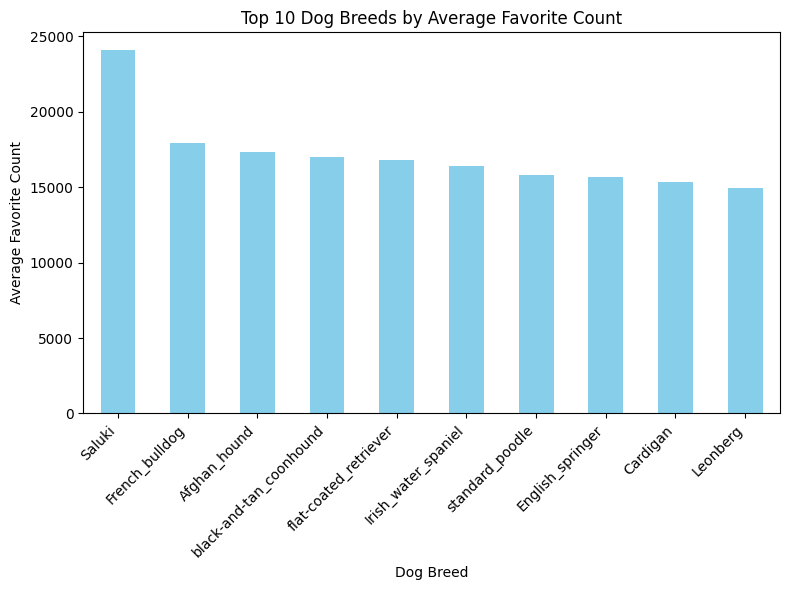

In [380]:
# Analyze the top dog breeds based on average favorite count
# Group by predicted dog breed (p1) and calculate the average favorite_count
top_dogs = (
    tidy_masterdf[tidy_masterdf['p1_dog']]
    .groupby('p1')['favorite_count']
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

print("Top 10 dog breeds by average favorite count:")
print(top_dogs)

# Visualization
plt.figure(figsize=(8,  6))
top_dogs.plot(kind='bar', color='skyblue')
plt.title('Top 10 Dog Breeds by Average Favorite Count')
plt.ylabel('Average Favorite Count')
plt.xlabel('Dog Breed')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Saluki!! interesting.. that was the 1st insight and visualization

hm now i want to find out if there is any interesting relationship between the rating and the retweet count...

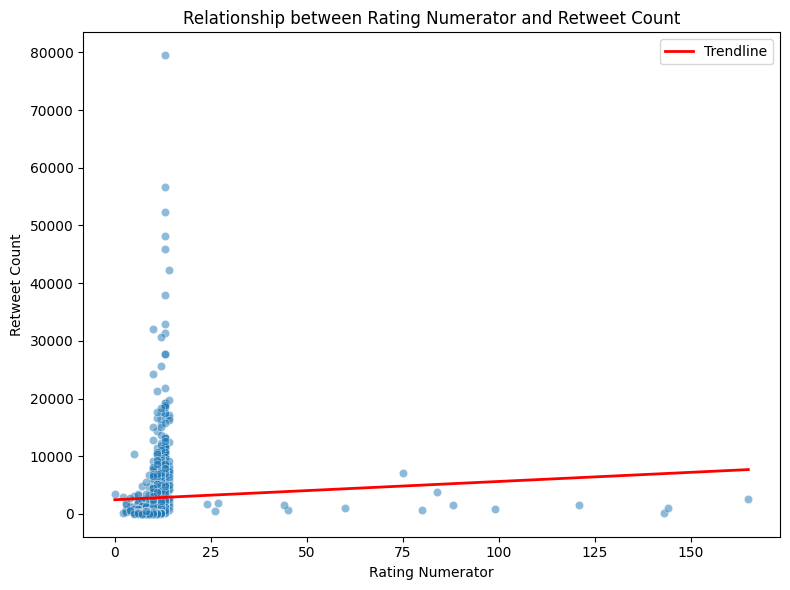

Correlation between rating_numerator and retweet count: 0.053


In [381]:
import numpy as np

# Analyze the relationship between rating_numerator and retweet count
plt.figure(figsize=(8, 6))
sns.scatterplot(data=tidy_masterdf, x='rating_numerator', y='retweet_count', alpha=0.5)

# Add a trendline using numpy polyfit
x = tidy_masterdf['rating_numerator']
y = tidy_masterdf['retweet_count']
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(np.sort(x), p(np.sort(x)), color='red', linewidth=2, label='Trendline')

plt.title('Relationship between Rating Numerator and Retweet Count')
plt.xlabel('Rating Numerator')
plt.ylabel('Retweet Count')
plt.legend()
plt.tight_layout()
plt.show()

# Calculate correlation
correlation_num = tidy_masterdf[['rating_numerator', 'retweet_count']].corr().iloc[0, 1]
print(f"Correlation between rating_numerator and retweet count: {correlation_num:.3f}")


that's something!! there doesn't seem to be a relation strong enough between how the account rated the dog and how much people wanted to share the post, that's insightful 2nd insght done

i want to know whats usually the highest rated dog breed i could use p1 and the rating numenator for this

Top 10 dog breeds by average rating_numerator:
p1
clumber                        27.000000
soft-coated_wheaten_terrier    25.454545
West_Highland_white_terrier    15.642857
Great_Pyrenees                 14.928571
borzoi                         14.444444
Labrador_retriever             13.905263
golden_retriever               13.244604
Pomeranian                     12.868421
Saluki                         12.500000
briard                         12.333333
Name: rating_numerator, dtype: float64


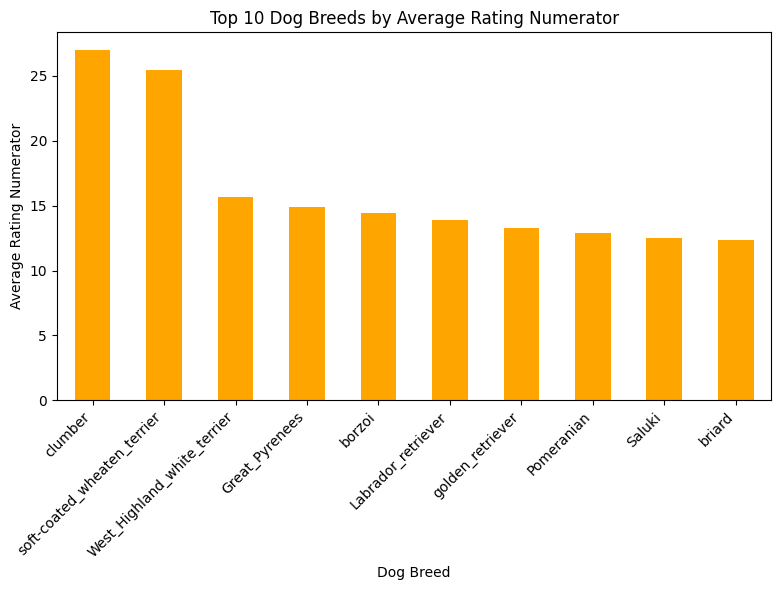

In [382]:
# Find the top dog breeds by average rating_numerator (using only rows where p1_dog is True)
top_rated_breeds = (
    tidy_masterdf[tidy_masterdf['p1_dog']]
    .groupby('p1')['rating_numerator']
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

print("Top 10 dog breeds by average rating_numerator:")
print(top_rated_breeds)

# Visualization
plt.figure(figsize=(8, 6))
top_rated_breeds.plot(kind='bar', color='orange')
plt.title('Top 10 Dog Breeds by Average Rating Numerator')
plt.ylabel('Average Rating Numerator')
plt.xlabel('Dog Breed')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Wow i didn't expect that one at all!! Sooo the dog breed named clumber and the terrier are really highly rated that's strange to me

so what is the dog breed that is the most frequently appearing over the years?

In [383]:
most_frequent_breed = (
    tidy_masterdf[tidy_masterdf['p1_dog']]
    .groupby('p1')
    .size()
    .sort_values(ascending=False)
    .head(1)
)
print("Most frequently appearing dog breed overall:")
print(most_frequent_breed)


Most frequently appearing dog breed overall:
p1
golden_retriever    139
dtype: int64


expected